# Scraping Data

In [1]:
!pip install google-play-scraper

In [2]:
from google_play_scraper import Sort, reviews
import pandas as pd

In [3]:
result = reviews(
    'com.gojek.gopay',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=7000
)

In [4]:
result = pd.DataFrame(result[0])
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              7000 non-null   object        
 1   userName              7000 non-null   object        
 2   userImage             7000 non-null   object        
 3   content               7000 non-null   object        
 4   score                 7000 non-null   int64         
 5   thumbsUpCount         7000 non-null   int64         
 6   reviewCreatedVersion  6921 non-null   object        
 7   at                    7000 non-null   datetime64[ns]
 8   replyContent          4528 non-null   object        
 9   repliedAt             4528 non-null   datetime64[ns]
 10  appVersion            6921 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 601.7+ KB


In [5]:
data = result.to_csv('result.csv', index=False)

# Data Cleaning

In [6]:
data = pd.read_csv('result.csv')
data = data.drop(['reviewId','userName', 'userImage', 'reviewCreatedVersion', 'replyContent', 'repliedAt'],axis=1)

In [7]:
data = data.drop_duplicates()
data = data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6921 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        6921 non-null   object
 1   score          6921 non-null   int64 
 2   thumbsUpCount  6921 non-null   int64 
 3   at             6921 non-null   object
 4   appVersion     6921 non-null   object
dtypes: int64(2), object(3)
memory usage: 324.4+ KB


In [8]:
data['at'] = pd.to_datetime(data['at'])
data = data[data['at'].dt.year == 2025]

data['month'] = data['at'].dt.month.astype('str')
data = data.drop(columns=['at'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6921 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        6921 non-null   object
 1   score          6921 non-null   int64 
 2   thumbsUpCount  6921 non-null   int64 
 3   appVersion     6921 non-null   object
 4   month          6921 non-null   object
dtypes: int64(2), object(3)
memory usage: 324.4+ KB


In [9]:
data.head()

,content,score,thumbsUpCount,appVersion,month
0,"aplikasinya bagus aja, cuma ad sedikit masalah...",3,25,1.56.1,8
1,utamakan efektivitas tolong kurangi animasi yg...,3,1,1.57.0,8
2,aplikasi nya udh bagus seperti yang lainnya ta...,2,25,1.56.1,8
3,Cukup kecewa update kali ini. Mengapa sistem b...,2,20,1.56.1,8
4,"promo tak sesuai kenyataan, harga ternyata leb...",1,24,1.53.0,8


In [10]:
print(data['appVersion'].unique())

['1.56.1' '1.57.0' '1.53.0' '1.52.0' '1.54.0' '1.51.0' '1.49.1' '1.49.0'
 '1.48.0' '1.45.0' '1.47.0' '1.46.1' '1.44.0' '1.56.0' '1.39.0' '1.26.1'
 '1.15.1' '1.21.0']


In [11]:
data['minorVersion'] = data['appVersion']
data = data.drop(columns=['appVersion'], axis=1)
data['majorVersion'] = data['minorVersion'].str[:3]
data.head()

,content,score,thumbsUpCount,month,minorVersion,majorVersion
0,"aplikasinya bagus aja, cuma ad sedikit masalah...",3,25,8,1.56.1,1.5
1,utamakan efektivitas tolong kurangi animasi yg...,3,1,8,1.57.0,1.5
2,aplikasi nya udh bagus seperti yang lainnya ta...,2,25,8,1.56.1,1.5
3,Cukup kecewa update kali ini. Mengapa sistem b...,2,20,8,1.56.1,1.5
4,"promo tak sesuai kenyataan, harga ternyata leb...",1,24,8,1.53.0,1.5


In [12]:
print(data['majorVersion'].unique())

['1.5' '1.4' '1.3' '1.2' '1.1']


# Exploratory Data Analysis

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data.describe()

,score,thumbsUpCount
count,6921.000000,6921.000000
mean,2.619997,6.474642
std,1.780944,32.643803
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,5.000000,2.000000
max,5.000000,1419.000000


<Axes: xlabel='score', ylabel='count'>

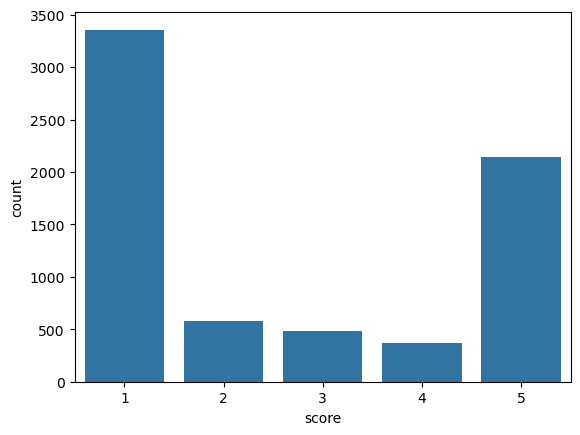

In [15]:
sns.countplot(data=data, x='score')

<Axes: xlabel='month', ylabel='count'>

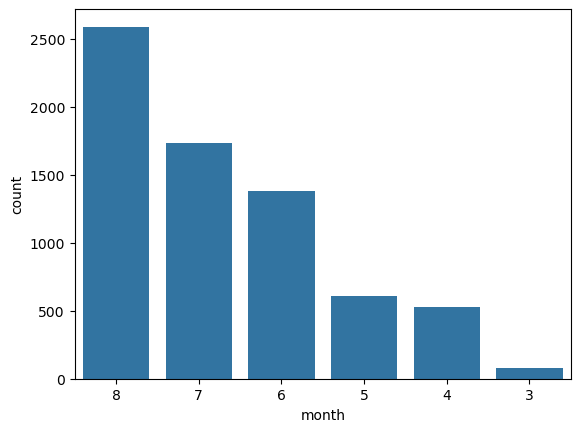

In [16]:
sns.countplot(data=data, x='month')

<Axes: xlabel='majorVersion', ylabel='count'>

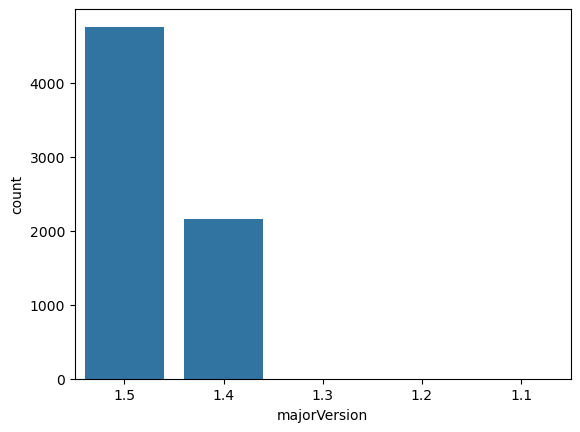

In [17]:
sns.countplot(data=data, x='majorVersion')

<Axes: xlabel='score', ylabel='thumbsUpCount'>

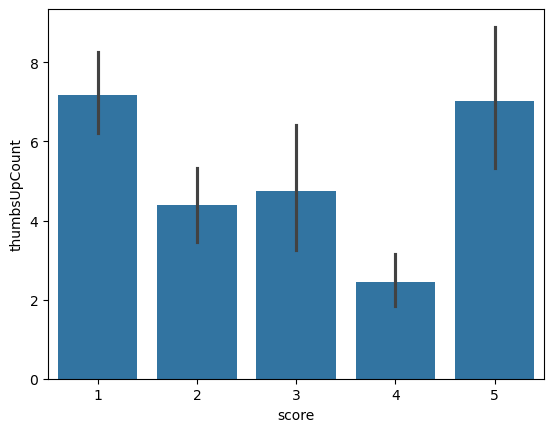

In [18]:
sns.barplot(data=data, x='score', y='thumbsUpCount')

<Axes: xlabel='majorVersion', ylabel='score'>

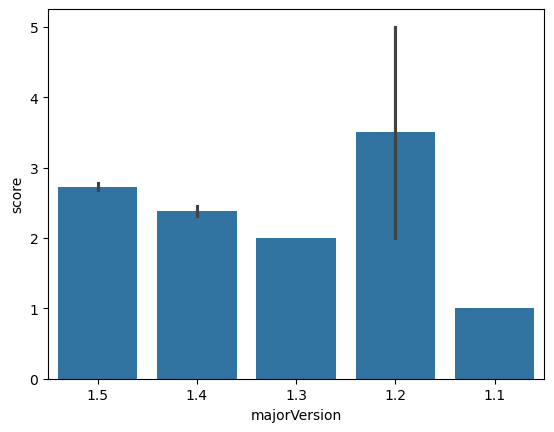

In [19]:
sns.barplot(data=data, x='majorVersion', y='score')

<Axes: xlabel='month', ylabel='Count'>

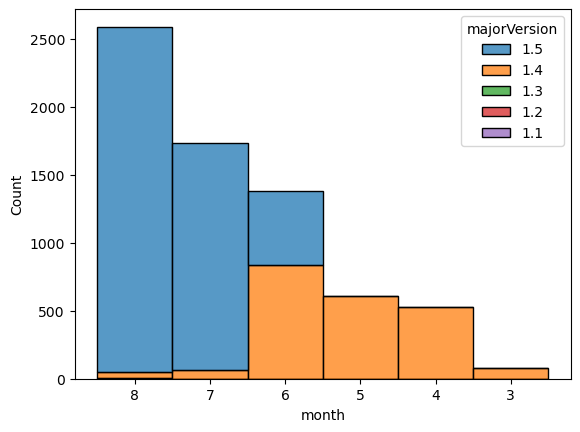

In [20]:
sns.histplot(data=data, x='month', hue='majorVersion', multiple="stack")

In [21]:
data.pivot_table(index='majorVersion',
                columns='month',
                values='score',
                aggfunc='mean')

month,3,4,5,6,7,8
majorVersion,,,,,,
1.1,NaN,NaN,NaN,NaN,NaN,1.000000
1.2,NaN,NaN,5.000000,NaN,NaN,2.000000
1.3,NaN,NaN,NaN,NaN,2.000000,NaN
1.4,2.101266,2.446768,2.362438,2.326190,2.733333,3.083333
1.5,NaN,NaN,NaN,2.158088,2.711895,2.857874


# Sentiment Analysis

In [22]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 40.7 MB/s eta 0:00:00


In [23]:
!pip install tqdm

In [24]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.0/802.0 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [nltk]1/2 [nltk]


In [25]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.5/561.5 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [transformers] [transformers]


In [26]:
import re
import string
from tqdm import tqdm
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from transformers import pipeline
tqdm.pandas()
import asyncio
import time
import transformers
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...


In [27]:
translator = pipeline(
    "translation",
    model="facebook/nllb-200-distilled-600M",
    src_lang="ind_Latn",
    tgt_lang="eng_Latn"
)

pipe = pipeline("text-classification", model="siebert/sentiment-roberta-large-english")

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


In [28]:
def translate(text):
  return translator(text)[0]["translation_text"]

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizing(text):
  tokens = word_tokenize(text)
  return tokens

def stopwordstext(text):
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [word for word in text if word not in stop_words]
  return filtered_tokens

def lemitizing(text):
  lemmatizer = WordNetLemmatizer()
  processed_text = [lemmatizer.lemmatize(word) for word in text]
  processed_text = " ".join(processed_text)
  return processed_text

def sentimenttext(text):
  result = pipe(text)
  return result[0]['label']

In [30]:
docs = pd.DataFrame(data['content'].reset_index(drop=True), columns=['content'])

docs['text_translate'] = docs['content'].progress_apply(translate)
docs['text_clean'] = docs['text_translate'].progress_apply(cleaningText)
docs['text_lower'] = docs['text_clean'].progress_apply(casefoldingText)
docs['text_tokenizing'] = docs['text_lower'].progress_apply(tokenizing)
docs['text_stopwords'] = docs['text_tokenizing'].progress_apply(stopwordstext)
docs['text_lemitizing'] = docs['text_stopwords'].progress_apply(lemitizing)
docs['text_label'] = docs['text_lemitizing'].progress_apply(sentimenttext)

 46% 3203/6921 [10:21<08:34,  7.23it/s]Your input_length: 183 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 58% 4015/6921 [13:05<07:32,  6.43it/s]Your input_length: 228 is bigger than 0.9 * max_length: 200. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
100% 6921/6921 [19:55<00:00,  5.79it/s]
100% 6921/6921 [00:00<00:00, 168896.67it/s]
100% 6921/6921 [00:00<00:00, 3057269.93it/s]
100% 6921/6921 [00:00<00:00, 34324.21it/s]
100% 6921/6921 [00:00<00:00, 44276.23it/s]
100% 6921/6921 [00:01<00:00, 5998.89it/s]
100% 6921/6921 [00:24<00:00, 284.04it/s]


In [31]:
docs

,content,text_translate,text_clean,text_lower,text_tokenizing,text_stopwords,text_lemitizing,text_label
0,"aplikasinya bagus aja, cuma ad sedikit masalah...","It's a good app, but it's just a little bit of...",Its a good app but its just a little bit of a ...,its a good app but its just a little bit of a ...,"[its, a, good, app, but, its, just, a, little,...","[good, app, little, bit, problem, trying, pay,...",good app little bit problem trying pay topup g...,POSITIVE
1,utamakan efektivitas tolong kurangi animasi yg...,please reduce the unnecessary animation to lig...,please reduce the unnecessary animation to lig...,please reduce the unnecessary animation to lig...,"[please, reduce, the, unnecessary, animation, ...","[please, reduce, unnecessary, animation, light...",please reduce unnecessary animation lighten ap...,NEGATIVE
2,aplikasi nya udh bagus seperti yang lainnya ta...,"The app is just as good as the others, but the...",The app is just as good as the others but ther...,the app is just as good as the others but ther...,"[the, app, is, just, as, good, as, the, others...","[app, good, others, theres, lot, weirdness, li...",app good others there lot weirdness like spin ...,NEGATIVE
3,Cukup kecewa update kali ini. Mengapa sistem b...,I'm pretty disappointed with the update this t...,Im pretty disappointed with the update this ti...,im pretty disappointed with the update this ti...,"[im, pretty, disappointed, with, the, update, ...","[im, pretty, disappointed, update, time, curre...",im pretty disappointed update time current gop...,NEGATIVE
4,"promo tak sesuai kenyataan, harga ternyata leb...","The promo is unrealistic, the price turns out ...",The promo is unrealistic the price turns out t...,the promo is unrealistic the price turns out t...,"[the, promo, is, unrealistic, the, price, turn...","[promo, unrealistic, price, turns, expensive, ...",promo unrealistic price turn expensive app ive...,NEGATIVE
...,...,...,...,...,...,...,...,...
6916,Udah lah gak bisa masuk kode otp nya juga gak ...,I can't get into the code. It's not being sent.,I cant get into the code Its not being sent,i cant get into the code its not being sent,"[i, cant, get, into, the, code, its, not, bein...","[cant, get, code, sent]",cant get code sent,NEGATIVE
6917,jangan ada lagi yang downlod apk gojeck dan se...,Don't let anyone else download apk gojeck and ...,Dont let anyone else download apk gojeck and s...,dont let anyone else download apk gojeck and s...,"[dont, let, anyone, else, download, apk, gojec...","[dont, let, anyone, else, download, apk, gojec...",dont let anyone else download apk gojeck stuff...,NEGATIVE
6918,ga jelas masa udh effort nunggu sampe jam 17.0...,It's not clear how long the effort will wait t...,Its not clear how long the effort will wait ti...,its not clear how long the effort will wait ti...,"[its, not, clear, how, long, the, effort, will...","[clear, long, effort, wait, till, g, get, wdp,...",clear long effort wait till g get wdp rupiah u...,NEGATIVE
6919,mantap aplikasi nya sederhana tapi keren gaya ...,It's a simple but cool modern style feature ab...,Its a simple but cool modern style feature abu...,its a simple but cool modern style feature abu...,"[its, a, simple, but, cool, modern, style, fea...","[simple, cool, modern, style, feature, abundan...",simple cool modern style feature abundant gopa...,POSITIVE


In [32]:
data = data.reset_index(drop=True)
docs = docs.reset_index(drop=True)
data['labels'] = docs['text_label']
data.head()

,content,score,thumbsUpCount,month,minorVersion,majorVersion,labels
0,"aplikasinya bagus aja, cuma ad sedikit masalah...",3,25,8,1.56.1,1.5,POSITIVE
1,utamakan efektivitas tolong kurangi animasi yg...,3,1,8,1.57.0,1.5,NEGATIVE
2,aplikasi nya udh bagus seperti yang lainnya ta...,2,25,8,1.56.1,1.5,NEGATIVE
3,Cukup kecewa update kali ini. Mengapa sistem b...,2,20,8,1.56.1,1.5,NEGATIVE
4,"promo tak sesuai kenyataan, harga ternyata leb...",1,24,8,1.53.0,1.5,NEGATIVE


<Axes: xlabel='labels', ylabel='count'>

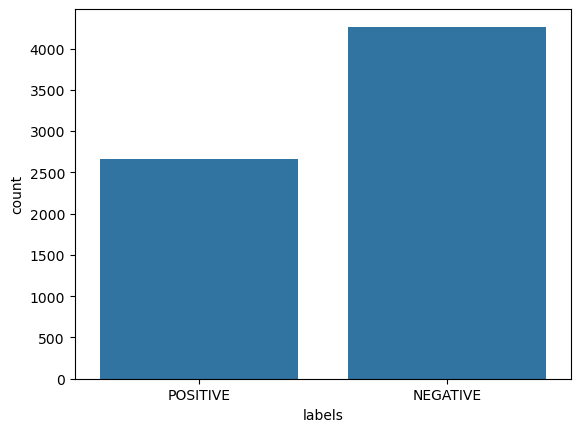

In [33]:
sns.countplot(data=data, x='labels')

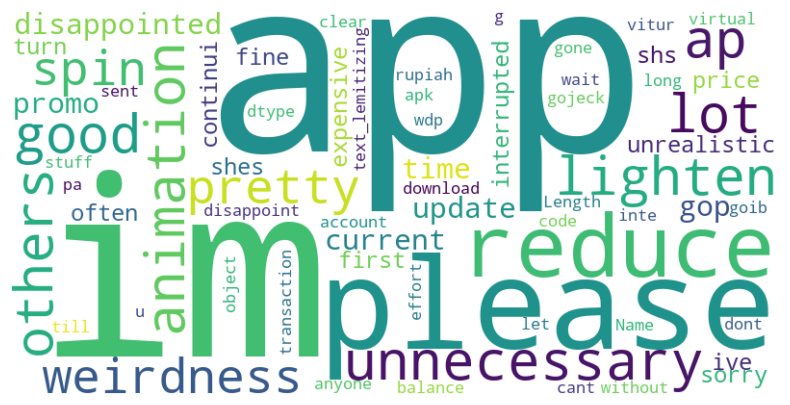

In [34]:
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(str(docs[docs['text_label']=='NEGATIVE']['text_lemitizing']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

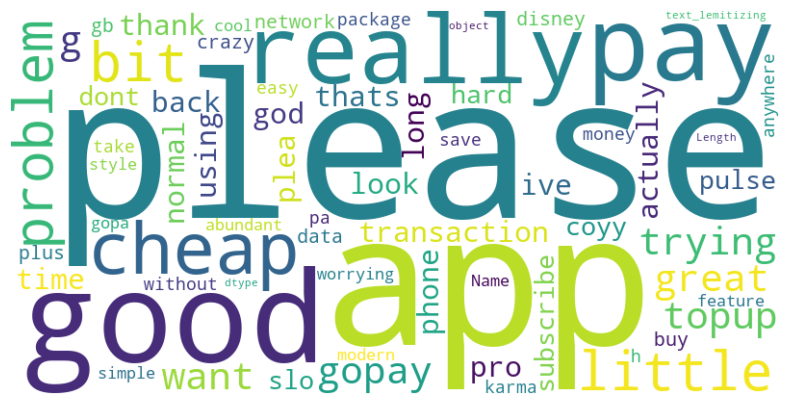

In [35]:
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(str(docs[docs['text_label']=='POSITIVE']['text_lemitizing']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: xlabel='labels', ylabel='score'>

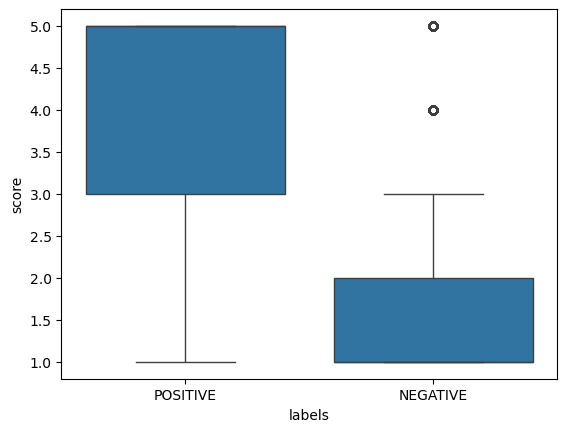

In [36]:
sns.boxplot(data=data, x='labels', y='score')

<Axes: xlabel='month', ylabel='Count'>

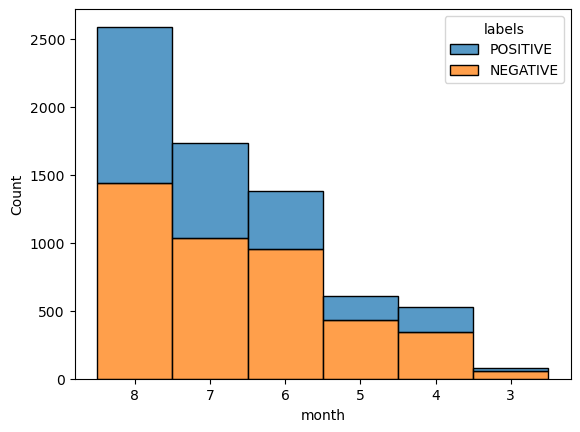

In [37]:
sns.histplot(data=data, x="month", hue="labels", multiple="stack")

<Axes: xlabel='majorVersion', ylabel='Count'>

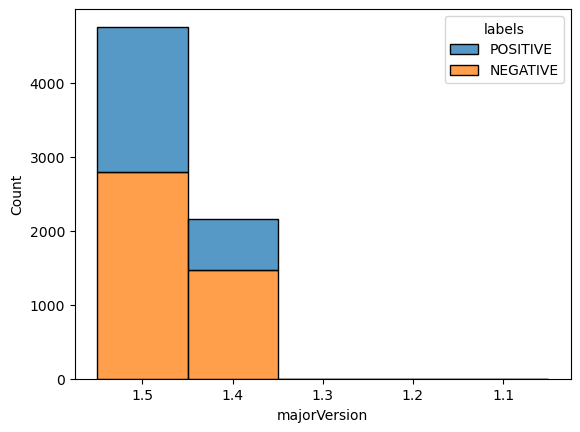

In [38]:
sns.histplot(data=data, x="majorVersion", hue="labels", multiple="stack")

# Topic Analysis

In [39]:
!pip install bertopic

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 84.5 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.40-cp312-cp312-linux_x86_64.whl size=847019 sha256=c9f3dd9c0ca24c3c764d3d802776f626a1bc148e0fb7edf56b30e7b610c70f74
  Stored in directory: /home/jovyan/.cache/pip/wheels/80/e7/bb/173ca0d8ce12718c4b5e6e01619c99653579b56969b97604b2
Successfully built hdbscan
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [bertopic]4/6 [sentence-transformers]


In [83]:
negative = docs[docs['text_label']=='NEGATIVE']['text_lemitizing']
positive = docs[docs['text_label']=='POSITIVE']['text_lemitizing']

In [69]:
from bertopic import BERTopic
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.representation import MaximalMarginalRelevance
from umap import UMAP

In [70]:
embedding_model = pipeline("feature-extraction", model="princeton-nlp/sup-simcse-roberta-large")
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
vectorizer_model = CountVectorizer(min_df=10,ngram_range=(1, 3))
ctfidf_model = ClassTfidfTransformer(bm25_weighting=True)
representation_model = MaximalMarginalRelevance(diversity=0.3)

def topic(n_cluster):
    topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=AgglomerativeClustering(n_clusters=n_cluster),
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    representation_model=representation_model,
    calculate_probabilities=True,
    verbose=True,
    )
    return topic_model

Device set to use cuda:0


In [84]:
negative_topic = topic(25)
negative_info = negative_topic.fit_transform(negative)
negative_info = negative_topic.get_topic_info()
negative_info.to_excel('negative_topic.xlsx')
negative_info

2025-08-31 03:32:55,493 - BERTopic - Embedding - Transforming documents to embeddings.
100% 4264/4264 [00:18<00:00, 231.88it/s]
2025-08-31 03:33:13,895 - BERTopic - Embedding - Completed ✓
2025-08-31 03:33:13,895 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-31 03:33:17,150 - BERTopic - Dimensionality - Completed ✓
2025-08-31 03:33:17,150 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-31 03:33:17,317 - BERTopic - Cluster - Completed ✓
2025-08-31 03:33:17,319 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-31 03:33:20,235 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,372,0_app_apk_gopay app_phone,"[app, apk, gopay app, phone, cant use, cant, p...",[there something gopay ive using gopay long ti...
1,1,303,1_lost_account_saving_using gopay,"[lost, account, saving, using gopay, gopay, iv...",[im disappointed gopay app transaction transfe...
2,2,284,2_cashback_game_promo_wdp,"[cashback, game, promo, wdp, free, instead, do...",[want get cashback get cashback dont get cashb...
3,3,264,3_code_game_discount_ad,"[code, game, discount, ad, buy, pay, dont like...",[dont know kind weird cave us promo code try p...
4,4,227,4_app_gopay app_feature_user,"[app, gopay app, feature, user, helpful, downl...",[ive invited friend download gopay app using l...
5,5,212,5_money_balance cut_doesnt_account,"[money, balance cut, doesnt, account, bank, go...",[balance doesnt come transaction history repor...
6,6,206,6_verification_phone_account_delete,"[verification, phone, account, delete, otp, lo...",[cant log account phone cant want log new one ...
7,7,193,7_money_low_gone_fund,"[money, low, gone, fund, error, failed, doesnt...",[bad losing money money doesnt come back money...
8,8,191,8_loan_never_application_million,"[loan, never, application, million, rejected, ...",[never late pay time apply another loan denied...
9,9,182,9_transfer_bank_problem_application,"[transfer, bank, problem, application, system,...",[bad bit problem report bot handling money can...


In [85]:
negative_topic.set_topic_labels({
    0: "Login & Account Access", 1: "Balance Not Credited", 2: "Facial Verification Failed", 3: "Customer Service Delay",4: "App Performance Issues",
    5: "Promo Voucher Failure", 6: "GoPay Plus Account Issues", 7: "Balance Cuts & Missing Top-ups",8: "Loan Denied", 9: "App Bugs & Errors",
    10: "Promo & Gift Frustration", 11: "Connectivity & Chat Issues", 12: "Fewer Discounts", 13: "Unreliable Game Top-ups", 14: "Balance Deducted Without Funds",
    15: "Delayed Bank Transfers", 16: "Missing Cashback/Promo", 17: "Cannot Claim Gifts/Promo", 18: "Top-up Deducted, Not Credited", 19: "Recent Top-ups Not Reflected",
    20: "Account Access Problems", 21: "Mandatory App Update Blocks Login", 22: "Delayed Balance After Bank Top-up", 23: "Payment/Service Access Blocked", 24: "Update Prompts & Intrusive Ads"
})

negative_info = negative_topic.get_document_info(negative)
negative_info["Sub Topic"] = negative_info["CustomName"]
negative_info = negative_info[["Document","Topic", "Sub Topic"]]
negative_info

,Document,Topic,Sub Topic
0,please reduce unnecessary animation lighten ap...,0,Login & Account Access
1,app good others there lot weirdness like spin ...,2,Facial Verification Failed
2,im pretty disappointed update time current gop...,1,Balance Not Credited
3,promo unrealistic price turn expensive app ive...,0,Login & Account Access
4,first shs fine shes often interrupted continui...,10,Promo & Gift Frustration
...,...,...,...
4259,im sorry disappoint vitur virtual account inte...,6,GoPay Plus Account Issues
4260,cant get code sent,13,Unreliable Game Top-ups
4261,dont let anyone else download apk gojeck stuff...,0,Login & Account Access
4262,clear long effort wait till g get wdp rupiah u...,3,Customer Service Delay


In [86]:
def get_topic_group(topic_number):
    if topic_number in [0, 6, 20, 21, 23]:
        return "Login & Account Access"
    elif topic_number in [1, 7, 14, 15, 18, 19, 22]:
        return "Balance & Transaction History"
    elif topic_number in [2, 8]:
        return "Verification & Loan Issues"
    elif topic_number == 3:
        return "Customer Service"
    elif topic_number in [4, 9, 11, 24]:
        return "App Performance & Features"
    else:
        return "Promotions, Vouchers & Cashback"

negative_info["Main Topic"] = negative_info["Topic"].progress_apply(get_topic_group)
negative_info = negative_info[["Document","Main Topic", "Sub Topic"]]

negative = data[data['labels']=='NEGATIVE'][["thumbsUpCount","month", "minorVersion","majorVersion"]]
negative_info = pd.concat([negative_info.reset_index(drop=True), negative.reset_index(drop=True)], axis=1)
negative_info

100% 4264/4264 [00:00<00:00, 647051.82it/s]


,Document,Main Topic,Sub Topic,thumbsUpCount,month,minorVersion,majorVersion
0,please reduce unnecessary animation lighten ap...,Login & Account Access,Login & Account Access,1,8,1.57.0,1.5
1,app good others there lot weirdness like spin ...,Verification & Loan Issues,Facial Verification Failed,25,8,1.56.1,1.5
2,im pretty disappointed update time current gop...,Balance & Transaction History,Balance Not Credited,20,8,1.56.1,1.5
3,promo unrealistic price turn expensive app ive...,Login & Account Access,Login & Account Access,24,8,1.53.0,1.5
4,first shs fine shes often interrupted continui...,"Promotions, Vouchers & Cashback",Promo & Gift Frustration,0,8,1.57.0,1.5
...,...,...,...,...,...,...,...
4259,im sorry disappoint vitur virtual account inte...,Login & Account Access,GoPay Plus Account Issues,0,6,1.48.0,1.4
4260,cant get code sent,"Promotions, Vouchers & Cashback",Unreliable Game Top-ups,0,6,1.47.0,1.4
4261,dont let anyone else download apk gojeck stuff...,Login & Account Access,Login & Account Access,0,7,1.45.0,1.4
4262,clear long effort wait till g get wdp rupiah u...,Customer Service,Customer Service Delay,0,7,1.52.0,1.5


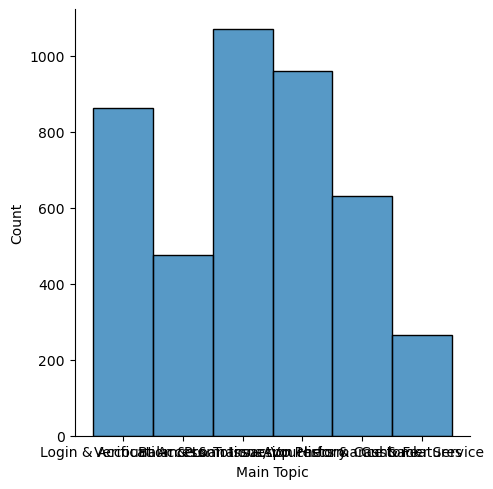

In [88]:
sns.displot(data=negative_info, x="Main Topic")

In [ ]:
negative_info = negative_topic.get_topic_info()
negative_info

In [44]:
positive_topic = topic(12)
positive_info = positive_topic.fit_transform(positive)
positive_info = positive_topic.get_topic_info()
positive_info.to_excel('positive_topic.xlsx')
positive_info

2025-08-31 02:42:21,887 - BERTopic - Embedding - Transforming documents to embeddings.
100% 2657/2657 [00:10<00:00, 244.04it/s]
2025-08-31 02:42:32,785 - BERTopic - Embedding - Completed ✓
2025-08-31 02:42:32,785 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-31 02:42:32,798 - BERTopic - Dimensionality - Completed ✓
2025-08-31 02:42:32,799 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-31 02:42:32,883 - BERTopic - Cluster - Completed ✓
2025-08-31 02:42:32,884 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-31 02:42:34,268 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,0,369,0_want_better_keep_im,"[want, better, keep, im, good, problem, always...",[im playing gift arena im gon na get jt im pla...
1,1,350,1_app_apk_want_like,"[app, apk, want, like, feature, great, thank, ...",[gopay reliable cheap money transfer want tap ...
2,2,339,2_transfer_app_wallet_easier,"[transfer, app, wallet, easier, pay, free, tha...",[availability gopay app easy pay bill want mak...
3,3,332,3_balance_money_time_transaction,"[balance, money, time, transaction, pay, get, ...",[im tf ewalet statement succeeded balance cut ...
4,4,317,4_free_transfer_payment_discount,"[free, transfer, payment, discount, transactio...",[hello im new list already love discount data ...
5,5,176,5_easy_simple_practical_helpful,"[easy, simple, practical, helpful, easier, use...","[simple easy use, simple easy use, good easy u..."
6,6,168,6_im_game_apk_always,"[im, game, apk, always, good, get, help, want,...",[im topup dont go bug apk transaction sometime...
7,7,154,7_transaction_helpful_service_quick,"[transaction, helpful, service, quick, apk, ap...",[quick easy transaction im afraid losing balan...
8,8,124,8_game_there lot_discount_get,"[game, there lot, discount, get, cheap, free, ...",[like money like money like money like money l...
9,9,118,9_cheap_discount_free_saving,"[cheap, discount, free, saving, quick, easier,...","[cheap easy use amazing, great lot discount al..."


In [ ]:
positive_topic.set_topic_labels({
    1: "Space Travel", 7: "Religion"
})

In [ ]:
positive_topic.merge_topics(positive, 
                           [[1,2],
                           [3,4]]
                           )

positive_info = positive_topic.get_topic_info()
positive_info

# Conclusion